<h1><center><font color = "red">Exploratory Data Analysis</font></center></h1>

<h2><font color = "green">Load Necessary Libraries and Data</font></h2>

In [16]:
%matplotlib inline
# other libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import joblib
import mrmr
import os

# display all features
pd.set_option("display.max_columns", None)

# matplotlib settings
mpl.rc('axes', labelsize=15)
mpl.rc('xtick', labelsize=14)
mpl.rc('ytick', labelsize=14)

# remove the top and right axis
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

warnings.filterwarnings(action="ignore")


In [17]:
DATASETS_file = "../feature_engineering"
csv_file = "matches_prep.csv"

csv_file_path = os.path.join(DATASETS_file, csv_file)
matches_df = pd.read_csv(filepath_or_buffer=csv_file_path)

print(f"matches_df shape:\t{matches_df.shape}")
matches_df.head()

matches_df shape:	(3970, 37)


,winner,h_odd,d_odd,a_odd,ht_rank,ht_ls_rank,ht_days_ls_match,ht_points,ht_l_points,ht_l_wavg_goals,ht_goals_sf,ht_l_wavg_goals_sf,ht_draws,ht_win_streak,ht_loss_streak,ht_draw_streak,at_rank,at_ls_rank,at_days_ls_match,at_points,at_l_points,at_l_wavg_goals,at_goals_sf,at_l_wavg_goals_sf,at_draws,at_win_streak,at_loss_streak,at_draw_streak,ls_winner,h_implied_prob,d_implied_prob,a_implied_prob,bookmaker_total_prob,h_realodd,d_realodd,a_realodd,real_total_prob
0,HOME_TEAM,1.68,4.22,4.96,8,8.0,4.0,58,3.000000,2.298375,39,0.691471,7,4,0,0,16,15.0,5.0,41,1.333333,2.012386,44,1.541537,14,1,0,0,AWAY_TEAM,0.595238,0.236967,0.201613,1.033818,0.575767,0.229215,0.195018,1.0
1,HOME_TEAM,6.99,4.92,1.45,11,17.0,4.0,52,1.333333,1.674424,45,1.528030,7,1,0,0,4,4.0,5.0,67,2.000000,1.448092,34,0.902502,10,1,0,0,DRAW,0.143062,0.203252,0.689655,1.035969,0.138094,0.196195,0.665710,1.0
2,AWAY_TEAM,1.80,4.26,4.14,5,5.0,5.0,66,1.000000,1.450428,46,1.877408,6,0,1,0,7,6.0,4.0,59,1.000000,1.492041,43,1.471424,8,0,1,0,AWAY_TEAM,0.555556,0.234742,0.241546,1.031843,0.538411,0.227498,0.234092,1.0
3,HOME_TEAM,1.17,8.76,16.62,3,1.0,4.0,66,3.000000,2.701787,42,0.556731,9,4,0,0,14,14.0,4.0,44,1.000000,1.530565,64,2.508214,8,0,1,0,AWAY_TEAM,0.854701,0.114155,0.060168,1.029025,0.830593,0.110935,0.058471,1.0
4,HOME_TEAM,1.30,6.23,9.86,1,2.0,5.0,83,1.000000,2.368167,32,2.569168,5,0,1,0,10,12.0,4.0,59,1.333333,0.628481,43,0.333162,8,1,0,0,AWAY_TEAM,0.769231,0.160514,0.101420,1.031164,0.745983,0.155663,0.098355,1.0


In [18]:
matches_df.dropna(inplace=True)
print(matches_df.shape)

(3944, 37)


For now we will seperate the 8 last features that we added with feature engineering, and keep only the given bookmaker's odds.

In [19]:
matches_df_2 = matches_df.iloc[:, :(matches_df.shape[1] - 8)]
matches_df_2.head()

,winner,h_odd,d_odd,a_odd,ht_rank,ht_ls_rank,ht_days_ls_match,ht_points,ht_l_points,ht_l_wavg_goals,ht_goals_sf,ht_l_wavg_goals_sf,ht_draws,ht_win_streak,ht_loss_streak,ht_draw_streak,at_rank,at_ls_rank,at_days_ls_match,at_points,at_l_points,at_l_wavg_goals,at_goals_sf,at_l_wavg_goals_sf,at_draws,at_win_streak,at_loss_streak,at_draw_streak,ls_winner
0,HOME_TEAM,1.68,4.22,4.96,8,8.0,4.0,58,3.000000,2.298375,39,0.691471,7,4,0,0,16,15.0,5.0,41,1.333333,2.012386,44,1.541537,14,1,0,0,AWAY_TEAM
1,HOME_TEAM,6.99,4.92,1.45,11,17.0,4.0,52,1.333333,1.674424,45,1.528030,7,1,0,0,4,4.0,5.0,67,2.000000,1.448092,34,0.902502,10,1,0,0,DRAW
2,AWAY_TEAM,1.80,4.26,4.14,5,5.0,5.0,66,1.000000,1.450428,46,1.877408,6,0,1,0,7,6.0,4.0,59,1.000000,1.492041,43,1.471424,8,0,1,0,AWAY_TEAM
3,HOME_TEAM,1.17,8.76,16.62,3,1.0,4.0,66,3.000000,2.701787,42,0.556731,9,4,0,0,14,14.0,4.0,44,1.000000,1.530565,64,2.508214,8,0,1,0,AWAY_TEAM
4,HOME_TEAM,1.30,6.23,9.86,1,2.0,5.0,83,1.000000,2.368167,32,2.569168,5,0,1,0,10,12.0,4.0,59,1.333333,0.628481,43,0.333162,8,1,0,0,AWAY_TEAM


<h2><font color = "green">Start of EDA</font></h2>

Lets check first the target variable.

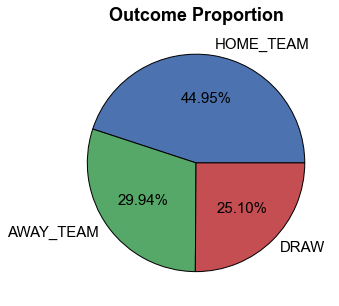

In [20]:
plt.style.use("seaborn")
plt.figure(figsize=(9, 5))
matches_df_2["winner"].value_counts().plot.pie(autopct='%1.2f%%', textprops={'color':"black", "fontsize": 15}, wedgeprops={"edgecolor":"k",'linewidth': 1})
plt.title(label="Outcome Proportion", fontdict={"fontsize": 18, "weight": "bold", "color": "black"})
plt.ylabel("")
plt.show()

Observations:
* We can see that the dominant class is the home team winning, which is common knowledge in soccer as home team tends to has more advantage.
* Also we can assume that it would be more difficult to predict a draw, since ~75% of the dataset contains matches that one of the two teams had the victory.

Now lets find the top 5 features (high correlation between each predictor seperatly with the target variable) which are good predictors for each outcome.

In [21]:
matches_dummies = pd.get_dummies(data=matches_df_2, columns=["winner", "ls_winner"])
matches_dummies.head()

,h_odd,d_odd,a_odd,ht_rank,ht_ls_rank,ht_days_ls_match,ht_points,ht_l_points,ht_l_wavg_goals,ht_goals_sf,ht_l_wavg_goals_sf,ht_draws,ht_win_streak,ht_loss_streak,ht_draw_streak,at_rank,at_ls_rank,at_days_ls_match,at_points,at_l_points,at_l_wavg_goals,at_goals_sf,at_l_wavg_goals_sf,at_draws,at_win_streak,at_loss_streak,at_draw_streak,winner_AWAY_TEAM,winner_DRAW,winner_HOME_TEAM,ls_winner_AWAY_TEAM,ls_winner_DRAW,ls_winner_HOME_TEAM
0,1.68,4.22,4.96,8,8.0,4.0,58,3.000000,2.298375,39,0.691471,7,4,0,0,16,15.0,5.0,41,1.333333,2.012386,44,1.541537,14,1,0,0,0,0,1,1,0,0
1,6.99,4.92,1.45,11,17.0,4.0,52,1.333333,1.674424,45,1.528030,7,1,0,0,4,4.0,5.0,67,2.000000,1.448092,34,0.902502,10,1,0,0,0,0,1,0,1,0
2,1.80,4.26,4.14,5,5.0,5.0,66,1.000000,1.450428,46,1.877408,6,0,1,0,7,6.0,4.0,59,1.000000,1.492041,43,1.471424,8,0,1,0,1,0,0,1,0,0
3,1.17,8.76,16.62,3,1.0,4.0,66,3.000000,2.701787,42,0.556731,9,4,0,0,14,14.0,4.0,44,1.000000,1.530565,64,2.508214,8,0,1,0,0,0,1,1,0,0
4,1.30,6.23,9.86,1,2.0,5.0,83,1.000000,2.368167,32,2.569168,5,0,1,0,10,12.0,4.0,59,1.333333,0.628481,43,0.333162,8,1,0,0,0,0,1,1,0,0


In [22]:
ht_win_corr = matches_dummies.corr()["winner_HOME_TEAM"].sort_values(ascending=False)[:6]
at_win_corr = matches_dummies.corr()["winner_AWAY_TEAM"].sort_values(ascending=False)[:6]
draw_corr = matches_dummies.corr()["winner_DRAW"].sort_values(ascending=False)[:6]

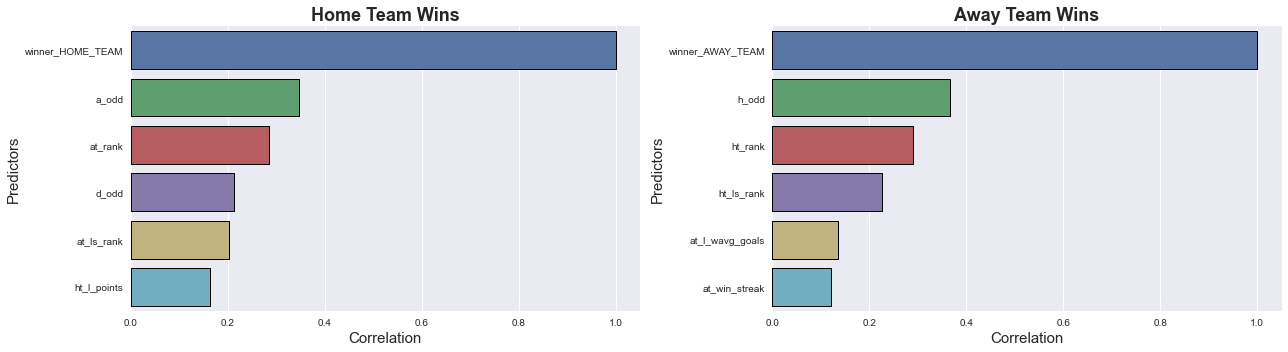

In [23]:
# Barplots of correlation matrices for the Home and Away teams. 

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))

titles = ["Home Team Wins", "Away Team Wins"]
corr_dfs = [ht_win_corr, at_win_corr]
for i in range(2):
    sns.barplot(x=corr_dfs[i].values, y=corr_dfs[i].index, edgecolor="black", linewidth=1, ax=ax[i])
    ax[i].set_title(label=titles[i], fontdict={"fontsize": 18, "weight": "bold"})
    ax[i].set_ylabel(ylabel="Predictors", fontdict={"fontsize": 15})
    ax[i].set_xlabel(xlabel="Correlation", fontdict={"fontsize": 15})
    ax[i].tick_params(top=False, right=False)
    plt.tight_layout()
    

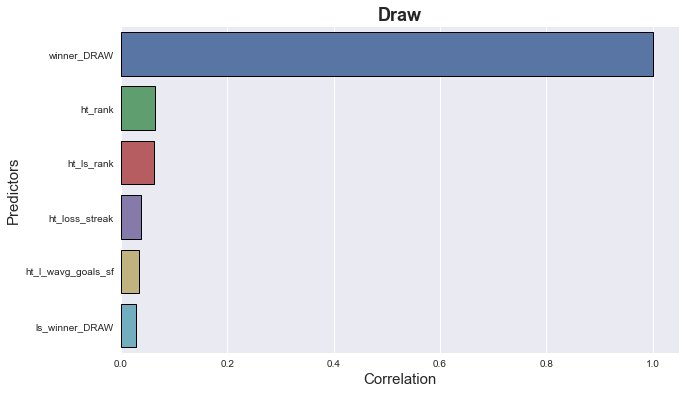

In [24]:
# Barplot for Draw outcome
plt.figure(figsize=(10, 6))
sns.barplot(x=draw_corr.values, y=draw_corr.index, edgecolor="black", linewidth=1)
plt.title(label="Draw", fontdict={"fontsize": 18, "weight": "bold"})
plt.ylabel(ylabel="Predictors", fontdict={"fontsize": 15})
plt.xlabel(xlabel="Correlation", fontdict={"fontsize": 15})
plt.tick_params(top=False, right=False)


Observations:
* From the "Home Team Wins" and "Away Team Wins" correlation barplots we can observe that the most correlated predictors are those that describe how bad the other team is doing, like odds and rank.
* From the "Draw" barplot it is clear that we have very low correlation compared two the other two barplots. Regardless of this, we can see that the features that are more correlated to a draw outcome are features that describe how bad the home team is doing.